# Bài toán thủy lực 2D

## Sai phân hóa hệ phương trình Reynolds
Viết lại hệ phương trình Reynolds

$$
\frac{{\partial u}}{{\partial t}} + u\frac{{\partial u}}{{\partial x}} + v\frac{{\partial u}}{{\partial y}} - fv =  - g\frac{{\partial z }}{{\partial x}} + \frac{{{\tau _{sx}}}}{{\rho \left( {h + z } \right)}} - Ku\frac{{\sqrt {{u^2} + {v^2}} }}{{h + z }} + A{\nabla ^2}u$$

$$
\frac{{\partial v}}{{\partial t}} + u\frac{{\partial u}}{{\partial x}} + v\frac{{\partial u}}{{\partial y}} + fu =  - g\frac{{\partial z}}{{\partial y}} + \frac{{{\tau _{sy}}}}{{\rho \left( {h + z } \right)}} - Kv\frac{{\sqrt {{u^2} + {v^2}} }}{{h + z }} + A{\nabla ^2}v$$

$$
\frac{{\partial z }}{{\partial t}} + \frac{\partial }{{\partial x}}\left[ {\left( {h + z } \right)u} \right] + \frac{\partial }{{\partial y}}\left[ {\left( {h + z } \right)v} \right] = 0$$

In [1]:
# Import necessary package
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

Khai báo lưới gồm có 101 nút ngang, 101 nút dọc, đồng nghĩa với 100 ô ngang và 100 ô dọc

In [12]:
# Common configuration
DIMX = 101
DIMY = 7

dx = 1.0 # Stepsize for x
dy = 1.0 # Stepsize for y

In [13]:
dt = 0.1
T_MAX = 2000


In [14]:
# Special conditions
f = 0
g = 9.81 
tau_sx = 0
tau_sy = 0
K = 0
A = 0

(7, 101)
(6, 100)


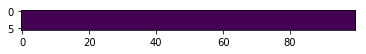

In [15]:
nodes = np.zeros((DIMY-0, DIMX-0), dtype=np.float32)
cents = np.zeros((DIMY-1, DIMX-1), dtype=np.float32)

print nodes.shape
print cents.shape

plt.imshow(cents)

In [16]:
# Declare the field of h: depth
h = np.ones_like(nodes)
print h.shape

(7, 101)


In [17]:
# Declare the field of u and v:
u = np.zeros((DIMY-1, DIMX-0), dtype=np.float32)
v = np.zeros((DIMY-0, DIMX-1), dtype=np.float32)
print u.shape
print v.shape

# Declare the field of zeta: surface elevation (original point is at static surface)
z = np.zeros_like(cents)
print z.shape

(6, 101)
(7, 100)
(6, 100)


In [18]:
a1 = np.zeros_like(z)
b1 = np.zeros_like(z)
c1 = np.zeros_like(z)
d1 = np.zeros_like(z)
print a1.shape
print b1.shape
print c1.shape
print d1.shape

(6, 100)
(6, 100)
(6, 100)
(6, 100)


In [19]:
# Initial conditions:
u = np.zeros_like(u, dtype=np.float32)
v = np.zeros_like(v, dtype=np.float32)

z = np.zeros_like(z, dtype=np.float32)
h = np.ones_like(h, dtype=np.float32)

In [20]:
# Predefine the period T
T = 31.927 # Unit: second

In [21]:
# Compute the omega
Omega = 2*np.pi/T
print Omega

0.196798487399


In [22]:
Lambda = 100*dx # Unit: meter
print Lambda

100.0


In [23]:
# Magnitude of z
Z0 = 0.01
print Z0

0.01


In [24]:
# Compute the C0: wave velocity in static fluid
C0 = np.sqrt(g) #h = 1 meter
print C0

3.13209195267


In [25]:
# Number of waves
k = 2*np.pi/Lambda
print k

0.0628318530718


In [26]:
# Boundary conditions: opened or closed boundary
boundary_left  = 'OPENED' # 
boundary_right = 'CLOSED'
boundary_up    = 'CLOSED'
boundary_down  = 'CLOSED'

print z.shape
print u.shape # u đánh số từ 0.5 đến 100.5, tương ứng trong code là 0 đến 100
print v.shape

(6, 100)
(6, 101)
(7, 100)


In [27]:
# Initially, 
t0=0

def zeta(Z0, x, t):
    return Z0 * np.cos(Omega*t) * np.cos(k*x) 

# z bên trái
z[:,0] = np.nan
z[:,1] = zeta(Z0, x=dx/2, t=t0+dt/2) # dx = 1.0, 

# u bên phải
u[:,-1] = 0

# v dưới = 0
v[ 0,:] = 0

# v trên = 0
v[-1,:] = 0


In [28]:
ls

Demo.ipynb  README.md  Simple_example_vi.ipynb


In [29]:
# Định nghĩa f1, f2, f3, f4, f5, f6, f7, f8
# Giải nửa bước thời gian đầu: t = t0+dt/2
f1 = np.zeros_like(u)
f1 = dt/(2*dx) * u + A*dt/(dx*dx)
# print f1.shape

# tính v trung bình v_bar

# Tính h_bar
h_bar = np.zeros_like(u, dtype=np.float32)
for j in range(0, DIMY-1):
    for i in range(0, DIMX-2):
        h_bar[j, i] = 0.50 * (h[j,i] + h[j-1,i])

# Tính z_bar
z_bar = np.zeros_like(u, dtype=np.float32)
for j in range(0, DIMY-1):
    for i in range(0, DIMX-2):
        z_bar[j, i] = 0.50 * (z[j,i+1] + z[j,i])
        
# Tính v_bar
v_bar = np.zeros_like(u, dtype=np.float32)
for j in range(0, DIMY-1):
    for i in range(0, DIMX-2):
        v_bar[j, i] = 0.25*( v[j+0, i+1] + v[j-1, i+1] + v[j+0, i+0] + v[j-1, i+0] )
f2 = -(2 + K*dt * (np.sqrt(np.square(u)+np.square(v_bar)))/(h_bar + z_bar) \
                + (2*dt*A)/(np.square(dx)))
print f2.shape

(6, 101)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in divide


In [30]:
print Omega
print k
print dx
print dt
print len(z_total)
print len(t_total)

0.196798487399
0.0628318530718
1.0
0.1


NameError: name 'z_total' is not defined

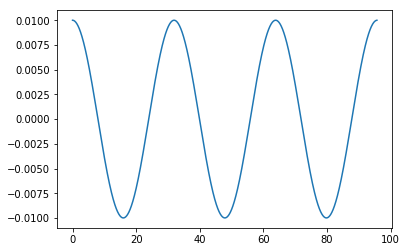

In [31]:
num  = np.floor(3*T/(dt/2)).astype(np.int32)
z_total = []
t_total = []
new_t=0
for step in range(num):
    new_z = zeta(Z0, dx/2, new_t)
    z_total.append(new_z)
    t_total.append(new_t)
    new_t = new_t + dt/2
    
    
plt.figure()
plt.plot(t_total, z_total)

In [36]:
zip(range(3), range(3))

[(0, 0), (1, 1), (2, 2)]